In [2]:
%pylab inline
import torch

Populating the interactive namespace from numpy and matplotlib


(-0.04996686279773713,
 1.0493054300546647,
 -0.04911754727363587,
 1.0494018614292144)

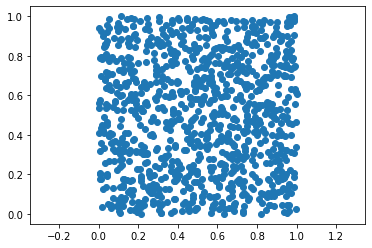

In [9]:
x = torch.rand(1000, 2)
scatter(*x.numpy().T)
axis('equal')

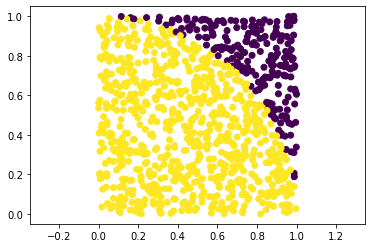

In [13]:
x_in_circle = (x**2).sum(1) < 1
def show(y):
    scatter(*x.numpy().T, c=y.numpy())
    axis('equal')

show(x_in_circle)

accuracy =  tensor(0.7080)


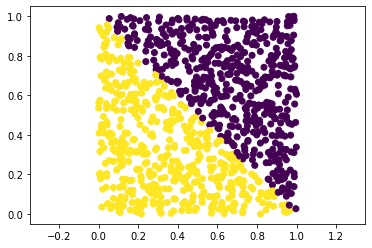

In [18]:
weights = torch.as_tensor([-1, -1], dtype=torch.float)
bias = torch.as_tensor(1, dtype=torch.float)

def classify(x, weights, bias):
    logit = (x * weights[None,:]).sum(1) + bias
    return logit > 0

def accuracy(pred_y):
    return (pred_y == x_in_circle).float().mean()

pred_y = classify(x, weights, bias)
show(pred_y)
print('accuracy = ', accuracy(pred_y))


In [19]:
def predict(x, weights, bias):
    logit = (x * weights[None,:]).sum(1) + bias
    return 1 / (1 + (-logit).exp())

def loss(p_y):
    return -(x_in_circle.float()*(p_y+1e-10).log() + (1 - x_in_circle.float())*(1-p_y+1e-10).log()).mean()

p_y = predict(x, weights, bias)
print('loss = ', loss(p_y))

loss =  tensor(0.5947)


loss =  tensor(0.5947) accuracy =  tensor(0.7080)


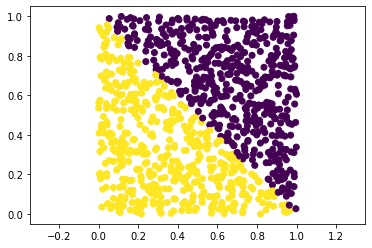

In [22]:
weights = torch.as_tensor([-1, -1], dtype=torch.float)
bias = torch.as_tensor(1, dtype=torch.float)

p_y = predict(x, weights, bias)
pred_y = classify(x, weights, bias)
show(pred_y)
print('loss = ', loss(p_y), 'accuracy = ', accuracy(pred_y))